# Kondensator dimensionieren für Blindstromkompensation

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
import sys
import os
import locale
import schemdraw
import schemdraw.elements as elm
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)
print('schemdraw', schemdraw.__version__)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.2
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/datetime.py'>
holidays 0.11.2
seaborn 0.11.2
plotly 5.1.0
sys 3.9.6 (default, Aug 18 2021, 19:38:01) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/os.py'>
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/locale.py'>
schemdraw 0.11


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>LERNZIELE</b></div>
    <ul>
        <li> Kondensator dimensionieren für Blindstromkompensation </li>
        <li> mithilfe von Wechselstromrechnung </li>
        <li> um den zeitlich variierenden resultierenden Leistungsfaktor zu ermitteln </li>
    </ul>
</div>

## Wechselstrombetrachtung

### Motoren und Co. als Ohmsch-induktive Lasten

Motorische Lasten (z. B. Motoren, Pumpen, etc.) benötigen in der Regel Blindleistung, um zu funktionieren: Die Wicklungen in einem Motor erzeugen bei Stromfluss ein magnetisches Feld, welches die Kräfte verursacht und somit die Umwandlung elektrischer in mechanische Energie ermöglicht. 

Der Ohmsche Anteil der Last besteht aus den Ohmschen Widerständen (z. B. Leitungswiderstände der Wicklung). Um das magnetische Feld an den Wicklungen des Motors auf- und wiederabzubauen, speichert der Schaltkreis elektrische Energie im magnetischen Feld und entlädt diese wieder. Dies geschieht periodisch mit dem Wechsel der Polarität des Wechselstroms.

### Zeitabhängiges Ersatzschaltbild für Ohmsch-induktive Lasten

Wie in [Kapitel 5](http://jfmay.gitlab.io/systemtechnik-fuer-energieeffizienz/05/05SYE.html) dargestellt (und in Lehrbüchern zur Elektrotechnik ausführlich erklärt), schwingt in einem Wechselstromkreis Blindleistung zwischen Quelle und induktiver bzw. kapazitiver Last hin und her. Im Folgenden betrachten wir eine Ohmsch-induktive Last (orange), die mit einem Kondensator (blau) kompensiert wird.

In [3]:
d = schemdraw.Drawing()
upperline = d.add(elm.LINE, d='right',l=6)
d.add(elm.CurrentLabelInline(direction='in').at(upperline).label('$I$'))
d.add(elm.DOT)
d.push()
cap = d.add(elm.CAP, d='down', label='$C$', color='blue')
d.add(elm.CurrentLabelInline(direction='in').at(cap).label('$I_C$'))
d.add(elm.DOT)
d.pop()
d.add(elm.LINE, d='right')
d.add(elm.DOT, color='orange')
d.push()
res = d.add(elm.RBOX, d='down', label='$R(t)$', color='orange')
d.add(elm.CurrentLabelInline(direction='in').at(res).label('$I_R$'))
d.add(elm.DOT, color='orange')
d.pop()
d.add(elm.LINE, d='right', color='orange')
ind = d.add(elm.INDUCTOR,d='down',label='$L(t)$', color='orange')
d.add(elm.CurrentLabelInline(direction='in').at(ind).label('$I_L$'))
d.add(elm.LINE, d='left', color='orange')
d.add(elm.LINE, d='left')
d.add(elm.LINE, d='left',l=6)
sou = d.add(elm.SOURCE_SIN, d='up', label='230 V/50 Hz')
d.add(elm.CurrentLabel(ofst=1.5, label='$U$').at(sou).down())
d.draw()

Im Ersatzschaltbild sind die Ohmschen Verluste durch den Widerstand $R$ und das induktive Verhalten durch die Induktivität $L$ modelliert. Dieses Verhalten ändert sich mit dem Arbeitspunkt: Im Teillastbereich überwiegen Ohmsche Verluste und im Volllastbereich ist ein elektrischer Motor in der Regel so gebaut, dass er dann möglichst geringe Verluste hat. Das bedeutet, dass, wenn wir uns ein Lastprofil ansehen, in der eine Last zeitweise in Teillast und zeitweise in Volllast betrieben wird, sich die Werte von $R$ und $L$ im Ersatzschaltbild ändern. Man könnte also sagen $R=R(t)$ und $L=L(t)$.

Der Kondensator wird hinzugeschaltet. Handelt es sich um einen einzelnen Kondensator, dann ist die Kapazität $C$ fix und kann nicht an den Arbeitspunkt angepasst werden.

### Leistungsbetrachtung

Nun lässt sich für einen mechanischen Leistungsverlauf $P_{\text{mech}}(t)$ ermitteln, wie viel Wirkleistung, Blindleistung und Scheinleistung die Last benötigt:

\begin{equation}
P(t) = R(t)\cdot I_R^2(t) = \frac{U^2}{R(t)}
\end{equation}

\begin{equation}
Q(t) = 2\pi f L(t) \cdot I_L^2(t) = \frac{U^2}{2\pi f L(t)}
\end{equation}

Es gilt weiterhin das Leistungsdreieck:

<a title="Saure at German Wikipedia, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Leistung-PQS-Zeiger.svg"><img width="256" alt="Leistung-PQS-Zeiger" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Leistung-PQS-Zeiger.svg/512px-Leistung-PQS-Zeiger.svg.png"></a>

Mit dem Wissen über die Winkelbeziehungen im Pythagoras-Dreieck erhält man den zeitabhängigen Leistungsfaktor:

\begin{equation}
\cos\varphi(t) = \frac{P(t)}{S(t)}
\end{equation}

Wird nun der Kondensator (blau) zugeschaltet, so reduziert sich die nach außen benötigte Blindleistung, da die Blindleistung am Kondensator $Q_C$ negativ ist. 

Die Wirkleistung $P(t)$ bleibt gleich, denn die mechanische Leistung $P_{\text{mech}}(t)$ bleibt hier auch gleich! 

Die neue nach außen hin benötigte Blindleistung beträgt:

\begin{equation}
Q_{\text{kompensiert}}(t) = Q(t) + Q_C(t)
\end{equation}

Dabei ist die Blindleistung am Kondensator:

\begin{equation}
Q_C(t) = -U^2 \cdot 2\pi f C = Q_C
\end{equation}

Nun benötigt die Schaltung also:

![Zeigerdiagramm_Scheinleistung_kompensiert](../img/Zeigerdiagramm_Scheinleistung_kompensiert.png)

- [ ] TODO $S_{\text{kompensiert}}$ (tiefgestellt) statt Snew nennen und $Q_{\text{kompensiert}}$ statt Q (schwarz), sonst ist Q (rot) und Q(schwarz) nicht eindeutig, außerdem $Q_C$ (tiefgestelltes C)

\begin{equation}
Q_{\text{kompensiert}}(t) = Q(t) - U^2 \cdot 2\pi f C
\end{equation}

Der neue Leistungsfaktor wird damit:

\begin{equation}
\tan\varphi_{\text{kompensiert}}(t) = \frac{Q_{\text{kompensiert}}(t)}{P(t)} = \frac{Q(t)-U^2 \cdot 2\pi f C}{P(t)} \rightarrow \cos\varphi_{\text{kompensiert}}(t) = \cos\arctan\left[ \frac{Q(t)-U^2 \cdot 2\pi f C}{P(t)} \right] 
\end{equation}

## Beispielberechnung

### Kurzes Ohmsch-induktives Lastprofil

<AxesSubplot:xlabel='Record Time'>

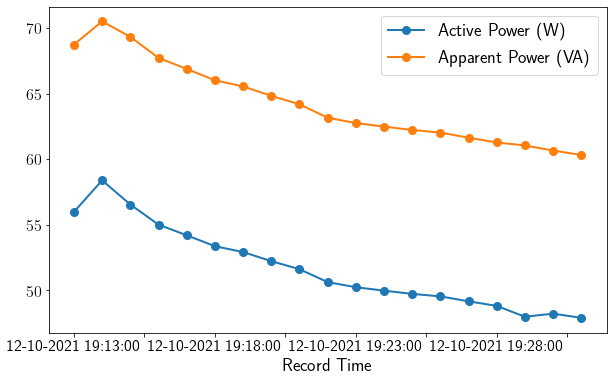

In [28]:
df = pd.read_csv('../data/Data-1903-2223_sye_2.csv')
df.plot(x='Record Time', y= ['Active Power (W)', 'Apparent Power (VA)'], marker = 'o')

### Zeitabhängiger Leistungsfaktor

<AxesSubplot:xlabel='Record Time'>

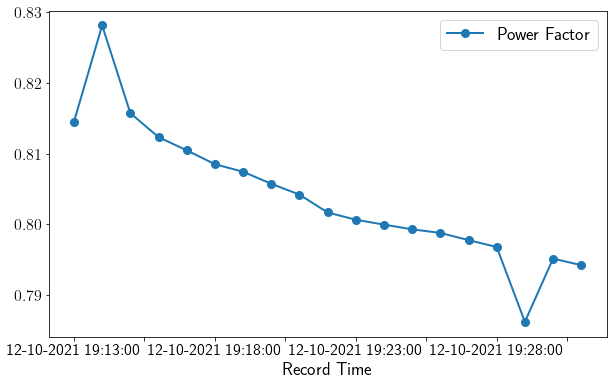

In [29]:
df['Power Factor'] = df['Active Power (W)'].astype(float)/df['Apparent Power (VA)'].astype(float) #cos_phi wird berechnet
df.plot(x='Record Time', y= 'Power Factor', marker = 'o')

Der Leistungsfaktor schwankt zwischen etwa 0,79 und 0,83.

### Kondensator dimensionieren

Um den Kondensator zu dimensionieren, stellt man die obige Formel um und berechnet für den maximalen Leistungsfaktor die Größe des Kondensators für die Kompensation auf einen Wunsch-Leistungsfaktor.

\begin{equation}
\cos\varphi_{\text{wish}} = \cos\arctan\left[ \frac{Q_{\cos\varphi\text{max}}  -U^2 \cdot 2\pi f C}{P_{\cos\varphi\text{max}} } \right] \rightarrow   C=   \frac{Q_{\cos\varphi\text{max}}    - P_{\cos\varphi\text{max}} \cdot\tan\varphi_{\text{wish}}}{U^2 \cdot 2\pi f}
\end{equation}

In [15]:
cosphi_wish = 0.95
cosphi_max = df['Power Factor'].max()

In [24]:
idx_cosphi_max = df['Power Factor'].idxmax()
P_cosphi_max = df['Active Power (W)'][idx_cosphi_max]
S_cosphi_max = df['Apparent Power (VA)'][idx_cosphi_max]
Q_cosphi_max = np.sqrt(S_cosphi_max**2 - P_cosphi_max**2)
U = 230
f = 50
C = (Q_cosphi_max - P_cosphi_max*np.tan(np.arccos(cosphi_wish)))/(2*np.pi*f*U**2)

In [26]:
print('Der Kondensator hat '+str(np.round(1e6*C,3))+' uF')

Der Kondensator hat 1.223 uF


### Neuen Leistungsfaktor für alle Zeitpunkte bestimmen

Der Kondensator wirkt sich zu jedem Zeitpunkt aus und verändert den Leistungsfaktor entsprechend.

\begin{equation}
\cos\varphi_{\text{kompensiert}}(t) = \cos\arctan\left[ \frac{Q(t)-U^2 \cdot 2\pi f C}{P(t)} \right] 
\end{equation}

<AxesSubplot:xlabel='Record Time'>

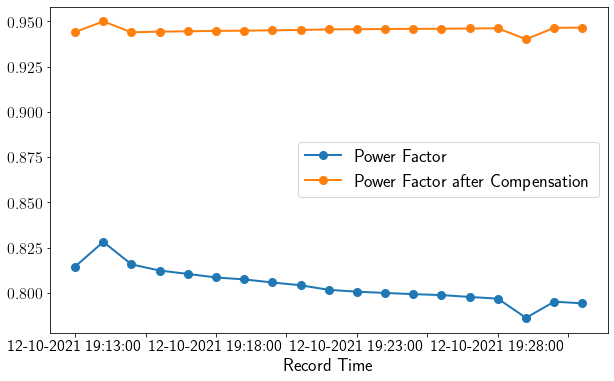

In [32]:
df['Power Factor after Compensation'] = np.cos(np.arctan((np.sqrt(df['Apparent Power (VA)']**2-df['Active Power (W)']**2)-2*np.pi*f*C*U**2)/(df['Active Power (W)'])))
df.plot(x='Record Time', y= ['Power Factor','Power Factor after Compensation'], marker = 'o')

Nun lässt sich, wie in Abschnitt [Blindstromkompensation modellieren](http://jfmay.gitlab.io/systemtechnik-fuer-energieeffizienz/08/SYE-model-reactive-power-comp.html) gezeigt, der dadurch veränderte Leistungsfluss simulieren und entsprechende Energieeinsparungen auf Zuleitungen ermitteln.

Außerdem lässt sich mit der Größe der Kapazität $C$, der Spannung $U$ ermitteln, wie viel in etwa so ein Kondensator kostet, um zu ermitteln, ob sich diese Maßnahme rechnet.

```{bibliography}
:filter: docname in docnames
```